<a href="https://colab.research.google.com/github/yamare1/amazon-electronics/blob/main/Python_Programming_Final_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Amazon Top 100 Electronics**

**ISBA 3730 - Programming for Business Applications**

Yonathan Amare, Victor Hurtado, Seamus Barrett, Rafael Salonikios


College of Business Administration

Loyola Marymount University

#**Executive Summary**

This report was made to guide our client, Smart Home Systems Inc, in order to figure out which product they should sell on Amazon in order to become one of the Top 100 selling electronics. First, we had questions that we wanted to answer through analyzing the data that gave us insights into what people were pruchasing and what products were succeeding. From there we cleaned the data and began analyzing our dataset. After we finished analyzing the data we were able to conclude what type of product, what features that product should have, the price point, and how reviews impacted the Top 100 product and gave all of this information to our clients so that they could make a decision on what type of product they want to sell.



#**Introduction**

We are four recent graduates from Loyola Marymount University who majored in Information Systems and Business Analytics. Right after graduation, the four of us started our own data analytics consulting firm, LM Consulting. One of our first clients, Smart Home Systems Inc, was a small tech start up that wanted to sell a new electronics product on Amazon. While Amazon sells the most electronics in the United States, our client wanted to know what kind products have the best chance to be successful and break into the Top 100 products.

Our primary business question that we decided we must answer for our client was, "What is the optimal product to make for Smart Home Systems Inc. to sell on Amazon, and what should the price be?"

To help our client and to answer our own main question, we wanted to answer some key supporting questions to find out what kind of product would be succesful on Amazon. We decided on some questions that would help us answer our big question. Some of these questions included, what was the most sold product? Which category was the most popular? What was the average cost? What's the most expensive and least expensive item? What ratings do these products get? and What is the minimum average rating necessary to secure a spot in the Top 100? We believe that these questions would give us valuable insights and a good understanding of what people are buying, price trends, and whether or not our client's product will succeed on Amazon.

This report will highlight how we analyzed the data to come up with our findings as well as the process that went through to arrive at our conclusion.

#**Main Content and Analysis**

##***Methodology***

##*IMPORTING DATA*

Our first step was importing the packages that we are going to use to analyze and present our data. The packages that were used to analyze our data were NumPy and Pandas and to present our findings we used Matplotlib.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The next step was to import our data set so we could begin analyzing it. We got our dataset from Kaggle.com as a CSV file. Our data shows the top 100 electronics products rankings on Amazon every day for 7 months in 2021. We realized that the NA values for the dataset are either "Not available" or "No customer reviews yet"

In [ ]:
df = pd.read_csv('AmazonTop100ElectronicsData.csv', na_values=['Not available', 'No customer reviews yet'])

In [ ]:
df

,date,number,name,rating,n_reviews,price
0,2021-02-01,1,Fire TV Stick 4K streaming device with Alexa V...,4.7,"512,797",$39.99
1,2021-02-01,2,"Amazon Smart Plug, works with Alexa – A Certif...",4.7,"328,652",$24.99
2,2021-02-01,3,Echo Show 5 -- Smart display with Alexa – stay...,4.6,"298,030",$44.99
3,2021-02-01,4,"All-new Echo Dot (4th Gen, 2020 release) | Sma...",4.7,"138,241",$44.99
4,2021-02-01,5,Roku Streaming Stick+ | HD/4K/HDR Streaming De...,4.7,"62,702",$39.00
...,...,...,...,...,...,...
18095,2021-07-31,96,Tile Slim (2020) 1-pack - Slim & Sleek Bluetoo...,4.6,"25,512",$28.73
18096,2021-07-31,97,"Blink Outdoor - wireless, weather-resistant HD...",4.4,"60,859",$99.99
18097,2021-07-31,98,EVISTR 16GB Digital Voice Recorder Voice Activ...,4.4,"12,196",$39.99
18098,2021-07-31,99,"Echo (4th Gen) | With premium sound, smart hom...",4.7,"71,566",$69.99


We wanted to learn a little but about the dataset that we were working with. The data set is a table with 18,100 rows and 6 colums. The data set gives us a date at which this electronic product was given this number ranking, a number or the rank of sales on Amazon at that date, the product name, average customer rating, the number of reviews for each product, and the price.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18100 entries, 0 to 18099
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       18100 non-null  object 
 1   number     18100 non-null  int64  
 2   name       18100 non-null  object 
 3   rating     17959 non-null  float64
 4   n_reviews  17959 non-null  object 
 5   price      17947 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 848.6+ KB


In [ ]:
df.describe()

,number,rating
count,18100.000000,17959.000000
mean,50.500000,4.624355
std,28.866867,0.185366
min,1.000000,1.000000
25%,25.750000,4.500000
50%,50.500000,4.700000
75%,75.250000,4.800000
max,100.000000,5.000000


Before we did any analysis of the data, we wanted to run the correlation function for the entire dataset. If there were a strongly positive or negative correlation between any of the columns, it would show here as a number close to either 1.0 or -1.0

In [ ]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,number,rating
number,1.000000,-0.114815
rating,-0.114815,1.000000


As we can see from the df.corr() function, there are unfortunately no strong correlations between any of the columns as a whole. This makes our job more difficult, as we cannot advise our client that changing the price or improving the ratings will be guaranteed to impact the sales. However, we can break the product ratings and price down using deeper analysis to see if there are any trends or numbers they should be shooting for, and also we are able to analyze which products have historically been the most popular and use the data to make inferences as to why.

##*PRODUCT POPULARITY ANALYSIS*

Now it was time to start answering our questions. To begin, we wanted to find which electronics were the most popular to give our client an idea of what type of products they should be looking to manufacture. The widest scope of analysis we could do on this data was a value_counts function with all of the data included, to see which products appeared in the top 100 the most

In [ ]:
df['name'].value_counts()

Blink Mini – Compact indoor plug-in smart security camera, 1080 HD video, night vision, motion detection, two-way audio…    302
Blink Outdoor - wireless, weather-resistant HD security camera, two-year battery life, motion detection, set up in…         255
Kindle Paperwhite – Now Waterproof with 2x the Storage – Ad-Supported                                                       195
Anker Power Strip with USB, 5 ft Extension Cord, PowerPort Cube USB with 3 Outlets and 3 USB Ports, Portable Design…        183
Ring Stick Up Cam Battery HD security camera with custom privacy controls, Simple setup, Works with Alexa - Black           182
                                                                                                                           ... 
All-New Insignia 55 inch NS-55F301NA22 F30 Series LED 4K UHD Smart Fire TV, Released 2021                                     1
Power Strip with USB, TROND Surge Protector Flat Plug with 4 Widely-Spaced Outlets, 3 USB Charger, 1440 

The Blink Mini and Blink Outdoor security cameras were by far the products that most often appeared in the top 100 rankings

Next, to dive deeper, we wanted to find which product was most frequently ranked the top selling item. To do this, we sliced for all of the products ranked 1 in 'number' on any given day

In [ ]:
rankedfirst = df[df['number'] == 1]


Here is how we found a list of the products that were the most often ranked #1 in the top 100:

In [ ]:
productrankings = rankedfirst['name'].value_counts()
productrankings

Fire TV Stick 4K streaming device with Alexa Voice Remote | Dolby Vision | 2018 release                                      113
Fire TV Stick 4K streaming device with Alexa Voice Remote (includes TV controls) | Dolby Vision                               46
Amazon Smart Plug, works with Alexa – A Certified for Humans Device                                                           11
All-new Echo Dot (4th Gen, 2020 release) | Smart speaker with Alexa | Charcoal                                                 5
Introducing Ring Video Doorbell Wired with Ring Chime                                                                          3
Blink Mini – Compact indoor plug-in smart security camera, 1080 HD video, night vision, motion detection, two-way audio…       2
Stilnend Telescope 70mm Aperture 500mm AZ Mount Astronomical Refractor Telescope for Kids Adults & Beginners Fully Multi…      1
Name: name, dtype: int64

We can use this data for a bar graph to show the client that the Amazon Fire Stick has dominated sales

Used this source off of Google to find the barh function https://zebrabi.com/guide/how-to-customize-horizontal-bar-chart-in-python-matplotlib/#:~:text=To%20create%20a%20horizontal%20bar,the%20categories%20and%20the%20values.&text=Here%2C%20categories%20are%20the%20labels,numerical%20values%20for%20each%20category.

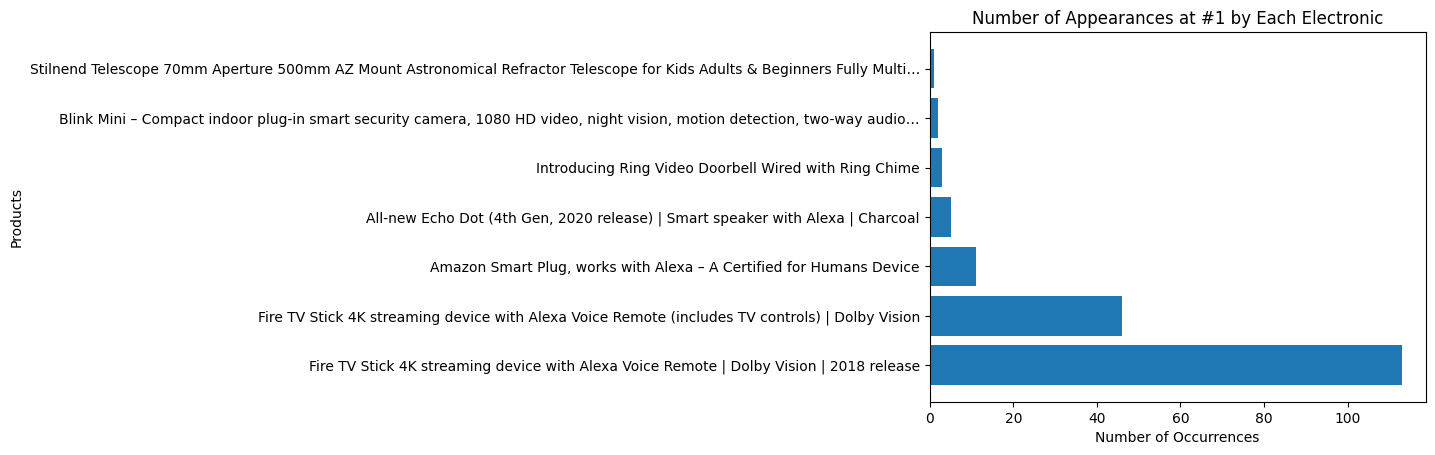

In [ ]:
plt.barh(productrankings.index, productrankings.values)

plt.xlabel('Number of Occurrences')
plt.ylabel('Products')
plt.title('Number of Appearances at #1 by Each Electronic')

plt.show()

By this list, we can see the rankings of the products that have been ranked #1 within the time the data was collected. The Fire TV Stick is by far the most highly ranked product, with two of its variations accounting for 159 of the first ranked products, with all other electronics sold on Amazon only reaching the number one spot a combined 22 times

We also wanted to repeat this same process, but with products in the top 5 to see if there would be any differences in the results

In [ ]:
rankedtopfive = df[df['number'].isin([1, 2, 3, 4, 5])]

In [ ]:
rankedtopfive['name'].value_counts()

Fire TV Stick 4K streaming device with Alexa Voice Remote | Dolby Vision | 2018 release                                      133
Amazon Smart Plug, works with Alexa – A Certified for Humans Device                                                          112
Echo Dot (3rd Gen) - Smart speaker with Alexa - Charcoal                                                                     102
Roku Express | HD Streaming Media Player with High Speed HDMI Cable and Simple Remote                                         92
Roku Streaming Stick+ | HD/4K/HDR Streaming Device with Long-range Wireless and Voice Remote with TV Controls                 89
All-new Echo Dot (4th Gen, 2020 release) | Smart speaker with Alexa | Charcoal                                                80
Fire TV Stick 4K streaming device with Alexa Voice Remote (includes TV controls) | Dolby Vision                               48
Fire 7 tablet (7" display, 16 GB) - Black                                                        

This provides a lot more information, but the top few products are generally the same as the slice of the number one products, with the Fire TV stick in first once again

We also wanted to find out generally which types of products were making the list most frequently, and to do this we hypothesized that we could break the 'name' list or large strings into multiple smaller one word strings, and then take that list and search for the most commonly appearing words. We expected to find some unwanted repeating words that do not help our search, such as company names, but we figured that the process could still be valuable if it turns up some product types

Used chatGPT to help figure a good amount of this code out. https://chat.openai.com/share/49087020-955b-4abf-87e7-ac3ce4011eab

In [ ]:
wordsinname = df['name'].str.split()

wordsinnamelist = [word for wordlist in wordsinname for word in wordlist]

topwordhits = pd.Series(wordsinnamelist).value_counts()
topwordhits

with            10687
-                5693
HD               4645
and              4227
|                3987
                ...  
Clamp               1
Tie                 1
Handle,             1
Down                1
Beamforming…        1
Length: 2514, dtype: int64

Unfortunately this search turned up mostly useless words, but there could be value if we expanded this new variable to see more of the top words that have turned up

In [ ]:
topwordhits.head(50)

with         10687
-             5693
HD            4645
and           4227
|             3987
for           3634
USB           3484
Power         3026
Smart         3023
Alexa         2908
Cable         2613
Fire          2242
–             2202
Black         2035
TV            1935
Surge         1896
3             1843
Camera        1783
Cord          1744
Echo          1631
Mini          1567
Extension     1547
8             1376
&             1353
2             1316
Strip         1301
Apple         1297
Cam           1287
5             1267
6             1238
10            1225
Roku          1206
1080p         1198
4             1146
Bluetooth     1131
Protector     1125
Streaming     1109
display,      1087
GB,           1052
Gen)          1034
Outlets       1034
Cord,         1011
security       996
Flat           975
Dot            973
Strip,         932
Wireless       927
32             919
Pack           909
speaker        909
dtype: int64

This gives us some good information to provide to the clients. TVs, Cameras, Extension cords, Cables, and Speakers are some of the most common devices to show up on this list. Some of the most common features that seem to be in well-performing electronic products are HD, Bluetooth, Smart devices, Streaming, and Wireless.

##*PRODUCT PRICE ANALYSIS*

Our next question was,  what was the average cost?

We did not only want to provide our client with ideas for what product they should be looking to manufacture, but also at which price point that would have the best chance of maximizing sales.

Here is how we found the average cost:

first we had to drop the NA values so the 'price' column can be an float value and not an object

In [ ]:
df[['price', 'n_reviews', 'rating']].dropna(inplace=True)

<ipython-input-9-b4890e300836>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['price', 'n_reviews', 'rating']].dropna(inplace=True)


We then had to drop the $ in the price column so we could be able to do calculations on the column, and convert it to a float

We had to use ChatGPT to find out how to remove the dollar sign. https://chat.openai.com/share/49087020-955b-4abf-87e7-ac3ce4011eab

In [ ]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype('float')

In [ ]:
df['price'].mean()


79.66110547723852

This shows that the mean price for all of the products in the top 100 in this time frame was $79.66

We were wondering whether the top 5 ranked products would have a different mean than the rest of the top 100, so we used the slice that we had created a slice for this different set of products and found the mean price of this slice

In [ ]:
rankedtopfive['price'] = rankedtopfive['price'].replace('[\$,]', '', regex=True).astype('float')

<ipython-input-115-39d662c69442>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rankedtopfive['price'] = rankedtopfive['price'].replace('[\$,]', '', regex=True).astype('float')


In [ ]:
rankedtopfive['price'].mean()

40.573008849557525

This shows that the average price for a top five ranked product was significantly lower than the average price for the entire dataframe. At an average of 40.57, the average price was 39.09 lower for these products in the upper echelon of the rankings

Next, we wanted to find out what's the most expensive and least expensive item?

Here is how we found the most expensive items:  

In [ ]:
df.sort_values(by='price', ascending=False)

,date,number,name,rating,n_reviews,price
3955,2021-03-12,56,Acer Predator Triton 500 PT515-52-73L3 Gaming ...,4.4,113,1625.00
14996,2021-06-30,97,2020 Apple MacBook Pro with Apple M1 Chip (13-...,4.8,"2,621",1289.00
16299,2021-07-13,100,2020 Apple MacBook Pro with Apple M1 Chip (13-...,4.8,"2,841",1284.94
16247,2021-07-13,48,"2021 Apple 12.9-inch iPad Pro (Wi‑Fi, 128GB) -...",4.8,406,1099.99
11899,2021-05-30,100,2020 Apple MacBook Pro with Apple M1 Chip (13-...,4.8,"2,028",1011.99
...,...,...,...,...,...,...
15093,2021-07-01,94,Fire TV Stick streaming media player with Alex...,4.7,"458,404",NaN
15490,2021-07-05,91,Fire TV Stick streaming media player with Alex...,4.7,"458,824",NaN
15684,2021-07-07,85,Fire TV Stick streaming media player with Alex...,4.7,"459,032",NaN
15881,2021-07-09,82,Fire TV Stick streaming media player with Alex...,4.7,"459,118",NaN


Our results show that the Acer Predator Triton 500 gaming laptop was the most expensive product to crack the top 100 electronics, at $1625

Here is how we found the cheapest items:

In [ ]:
df.sort_values(by='price', ascending=True)

,date,number,name,rating,n_reviews,price
12113,2021-06-02,14,Sabrent 4-Port USB 2.0 Hub with Individual LED...,4.6,"70,626",1.50
2999,2021-03-02,100,"Ring Spare Parts Kit for Floodlight Cam, Black",4.7,"1,617",1.99
16479,2021-07-15,80,Ring Spare Parts Kit for Video Doorbell (2020 ...,4.7,"5,202",1.99
17981,2021-07-30,82,Ring Spare Parts Kit for Video Doorbell (2020 ...,4.8,"5,734",1.99
2386,2021-02-24,87,"Ring Spare Parts Kit for Floodlight Cam, Black",4.7,"1,458",1.99
...,...,...,...,...,...,...
15093,2021-07-01,94,Fire TV Stick streaming media player with Alex...,4.7,"458,404",NaN
15490,2021-07-05,91,Fire TV Stick streaming media player with Alex...,4.7,"458,824",NaN
15684,2021-07-07,85,Fire TV Stick streaming media player with Alex...,4.7,"459,032",NaN
15881,2021-07-09,82,Fire TV Stick streaming media player with Alex...,4.7,"459,118",NaN


Our results show that the Sabrent 4-Port USB 2.0 Hub was the least expensive product to crack the top 100 electronics, at $1.50

These outliers show a wide range that a product can be priced at to make it into the top 100, with products appearing on the list with a price anywhere from 1.50 to 1625.00

We also could have used the .describe() function for some of these calculations, and it also shows us a number of other valuable statistics

In [ ]:
df.price.describe()

count    17947.000000
mean        79.661105
std        101.162107
min          1.500000
25%         18.990000
50%         39.590000
75%         99.990000
max       1625.000000
Name: price, dtype: float64

We have some crazy outliers in the data, such as 1.50 and 1625.00, but these statistics can show us where the large majority is. The 75% is at 99.99 and the 25% is at 18.99, and we would recommend that our client stay between those numbers

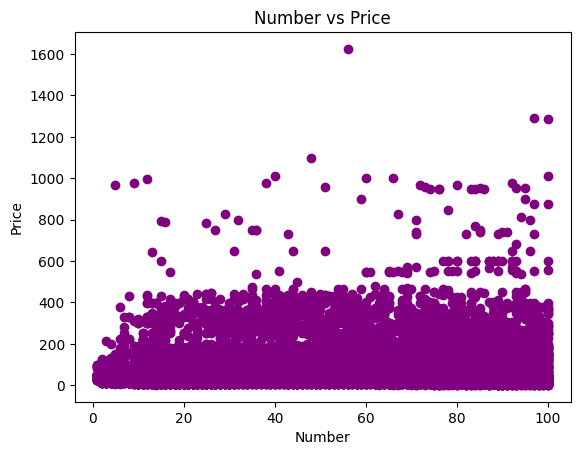

In [ ]:
plt.scatter(number, price, color='purple', marker='o')

plt.xlabel('Number')
plt.ylabel('Price')
plt.title('Number vs Price')

plt.show()

This visualization shows that regardless of the number on the list, the prices of all of the products are generally pretty low.

##*PRODUCT RATINGS ANALYSIS*

We have done analysis to find the most popular products, and the price points at which they sell. Now, we also want to look at the reviews for these products. It could be helpful for our clients to have a benchmark goal to strive for in their customer reviews to tell them whether they can achieve the top 100 list

We first wanted to find the average product rating for all the products on the top 100.

In [ ]:
df['rating'].mean()

4.624355476362826

The average rating was found to be 4.62 out of 5 for electronics in the top 100

We again wanted to see if there would be a difference between the entire dataset, and the slice of products that had been ranked in the top 5

In [ ]:
rankedtopfive['rating'].mean()

4.663636363636364

The average rating for these products that were higher up on the list did increase, but surprisingly it was by a very incremental margin. The average rating was 4.66, only 0.04 higher than the overall average

We decided it would be worthwhile to find the lowest rating as well, so we could give the client a low benchmark that they should not let their product fall below in ratings if they want to maintain a successful product

In [ ]:
df.sort_values(by='rating', ascending=True)

,date,number,name,rating,n_reviews,price
16404,2021-07-15,5,Wyze Cam Plus 3 Month Subscription,1.0,1,5.97
11895,2021-05-30,96,Light^ning Connector Earbuds Earphone Wired He...,1.7,26,14.95
14949,2021-06-30,50,Hidden Spy Camera Wireless WiFi Hidden Camera ...,2.7,108,52.99
3850,2021-03-11,51,Wyze Cam v3 1080p HD IndWyze Cam v3 1080p HD I...,3.0,4,29.98
10933,2021-05-21,34,"Webcam HD 1080p Web Camera, USB PC Computer We...",3.0,4,21.99
...,...,...,...,...,...,...
17858,2021-07-29,59,Mini Spy Camera - 1080p Hidden Camera With Aud...,NaN,NaN,49.99
17929,2021-07-30,30,Mini Spy Camera - 1080p Hidden Camera With Aud...,NaN,NaN,49.99
17947,2021-07-30,48,Echo Dot (4th Gen) Limited Edition | Diane von...,NaN,NaN,59.99
18032,2021-07-31,33,Mini Spy Camera - 1080p Hidden Camera With Aud...,NaN,NaN,49.99


We can see from this that remarkably it is possible to break Amazon's top 100 electronics list with a 1.0 rating. However, this is likely an anoymaly, as there is only one rating. The product was ranked at #5 with a 1.0 rating from one user, so it is reasonable to assume it was a new product. The next product on the list had a larger sample size with a 1.7 rating in 26 reviews. Despite the possibility of making the list with these low ratings, out of all 18,100 products, there are only 3 products that have made this list with a rating under 3.0, so we advise our client to keep their product rated over 3.0

In [ ]:
price = df.price
rating = df.rating
number = df.number

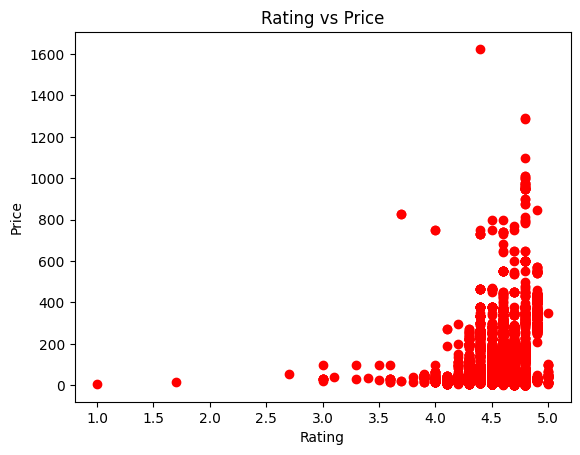

In [ ]:
plt.scatter(rating, price, color='red', marker='o')

plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Rating vs Price')

plt.show()

Here is a visualization to show that the majority of data points are priced lower and have higher ratings

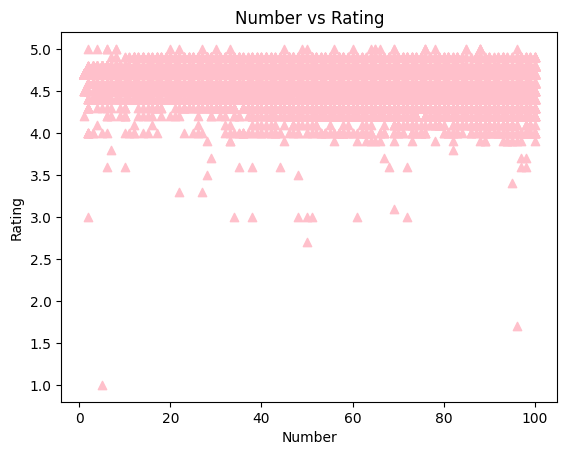

In [ ]:
plt.scatter(number, rating, color='pink', marker='^')

plt.xlabel('Number')
plt.ylabel('Rating')
plt.title('Number vs Rating')

plt.show()

This visualization shows that throughout the list, regardless of what number the products are on the list, the ratings are generally between 4.0 and 5.0

##***Findings, Interpretations, and Recommendations***

After analyzing the top 100 electronics products on Amazon, we found a lot of information that can guide Smart Home Systems Inc..

Here is what we found and what we recommend to our clients:

We first needed to answer our primary business question, "What is the optimal product to make for Smart Home Systems Inc. to sell on Amazon, and what should the price be?"

Our answer to this question is that Smart Home Systems Inc. should manufacture a universal TV remote.

The Amazon Fire Stick and Roku Universal Remote were two of the most popular products. This shows that streaming devices and accessories for TVs are super popular, which helps our clients. This suggests that manufacturing a product that is compatible with the Fire Stick TV Stick and Roku streaming devices could enhance our chances of breaking into the top 100. We believe that this would make a universal remote a great product, as anything that consumers would purchase with these two products would have the potential to make a lot of sales. Some of the most common words that were in the products were related to Voice assistance and Digital, so we would advise our clients to implement this into the remote to differentiate themselves and convince people to purchase their product instead of the other TV remotes that appear on the top 100 list.

We also wanted to advise them on price. The average price of all products in the top 100 was 79.66. However, the top 5 ranked products had an average price of 40.57. This trend shows that lower prices actually give a product more chance to be competitive on the sales rankings. We would advise our clients to try and sell their products below the average price of the top 5 ranked products at the 30 - 35 dollar range to remain competitive and set themselves apart from the other TV remotes on the market.

Almost all of the products in the top 100 had a high average rating. The average product rating for the top 100 was 4.62 stars out of 5. Products in the top 5 had an average rating of 4.66. It is possible to break the list with a product that has an averae ranking anywhere over 3.0, but these lower rated products on the list are outliers that tend to be kicked off the list in a shorter time period. We would recommend that our client makes a quality product that can maintain a rating from 4.5 - 4.7 to remain on the top 100 list and stay competitive. Another recommendation for our client is that they give incentives like a discount on their other products for leaving a rating on Amazon.



##***Biggest Challenges and What We Could've Done Differently***

After completing this project, we agreed that our biggest challenges were finding what portions of our project to visualize. We felt that we had a good amount of analysis done on the dataset to make valuable recommendations for our client, but that sometimes it was hard how to conceptualize how to show that in a graph or a plot.

If we could go back in time and complete this project again we would have done more research into how we can effectively visualize our recommendatins in an effective way to get our point across to the client. We pushed the project back a bit and the time crunch made it difficult to put enough time in to effectively overcome this problem, so in hindsight we definitely should have started earlier.

#**Summary and Conclusions**

In conclusion, our report was made to help Smart Home Systems Inc., a tech startup that wants to sell a new electronic product on Amazon. Our analysis focused on answering key questions on product popularity, average cost, and average ratings for the 100 most popular electronic items on Amazon. After answering our questions we were able to recommend Smart Home Systems Inc. on the best course of action.

Our final recommendation was that Smart Home Systems Inc. produce a smart remote that would be compatible with the Amazon Fire Stick and Roku Products. We recommend that they price it in the 30 - 35 dollar range, equip it with voice assistance capabilities, and make sure it is of high enough quality to maintain reviews between 4.5 - 4.7. Based on all of our analysis, this product would have an extremely high likelihood of achieving a spot in the top 100 and maintaining that spot for a long period of time.

#**Bibliography**

https://ecommercedb.com/ranking/stores/ww/consumer-electronics?page=1&pagesize=50&specialist=all&currency=USD

https://chat.openai.com/share/49087020-955b-4abf-87e7-ac3ce4011eab

https://zebrabi.com/guide/how-to-customize-horizontal-bar-chart-in-python-matplotlib/#:~:text=To%20create%20a%20horizontal%20bar,the%20categories%20and%20the%20values.&text=Here%2C%20categories%20are%20the%20labels,numerical%20values%20for%20each%20category.



#**Appendices**

https://www.kaggle.com/datasets/annpastushko/amazon-top-100-best-sellers-in-electronics-2021